In [68]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt

## The Game

"Pass the Pigs" is a fun and simple dice game, but instead of dice, players toss two little rubber pigs. Each pig's landing position scores different points. The aim is to score exactly 100 points. On each turn, a player can decide to keep throwing the pigs to accumulate more points or pass them to the next player. But be careful! If the pigs land in positions that score zero points (like one pig on its back and the other on its side, known as an "oinker"), the player loses all points from that turn, and the pigs are passed on. If you score more than 100 points, you bust and lose all points from that round too. The game often involves risk and strategy in deciding when to stop throwing and when to keep going.

## The models

### Model 1 (how many rolls should I aim for?)

### Model 2 (what score should I aim for?)



## Lets define the probability and point system of this game.
Values taken from https://pubsonline.informs.org/doi/pdf/10.1287/ited.1120.0088


In [77]:
# Probabilities for each position a pig can land in
positions = {
    'Side (no dot)': 34.9,
    'Side (dot)': 30.2,
    'Razorback': 22.4,
    'Trotter': 8.8,
    'Snouter': 3.0,
    'Leaning Jowler': 0.6
}

# Point System
data = {
    'Side (no dot)': [1, 0, 5, 5, 10, 15],
    'Side (dot)': [0, 1, 5, 5, 10, 15],
    'Razorback': [5, 5, 20, 10, 10, 20],
    'Trotter': [5, 5, 10, 20, 15, 20],
    'Snouter': [10, 10, 15, 15, 40, 25],
    'Leaning Jowler': [15, 15, 20, 20, 25, 60]
}

# Define the index for the DataFrame
index = ['Side (no dot)', 'Side (dot)', 'Razorback', 'Trotter', 'Snouter', 'Leaning Jowler']


#-------------------------------------------
# Create the point system DataFrame
df_points = pd.DataFrame(data, index=index)

# Print the DataFrame
print(df_points)

#-------------------------------------------
# Create the probabilities DataFrame

# Normalize probabilities to sum to 1 (they are given in percentages)
total_probability = sum(positions.values())
for key in positions.keys():
    positions[key] /= total_probability

# Compute the joint probabilities for two pigs
data = []
for pos1, prob1 in positions.items():
    row = []
    for pos2, prob2 in positions.items():
        # Multiply the probabilities of the two positions
        joint_probability = prob1 * prob2
        row.append(joint_probability)
    data.append(row)

# Creating a DataFrame to display the probabilities in a table format
df_prob = pd.DataFrame(data, columns=positions.keys(), index=positions.keys())

# Display the table
print(df_prob)

                Side (no dot)  Side (dot)  Razorback  Trotter  Snouter  \
Side (no dot)               1           0          5        5       10   
Side (dot)                  0           1          5        5       10   
Razorback                   5           5         20       10       15   
Trotter                     5           5         10       20       15   
Snouter                    10          10         10       15       40   
Leaning Jowler             15          15         20       20       25   

                Leaning Jowler  
Side (no dot)               15  
Side (dot)                  15  
Razorback                   20  
Trotter                     20  
Snouter                     25  
Leaning Jowler              60  
                Side (no dot)  Side (dot)  Razorback   Trotter   Snouter  \
Side (no dot)        0.122045    0.105609   0.078333  0.030774  0.010491   
Side (dot)           0.105609    0.091387   0.067783  0.026629  0.009078   
Razorback            0

### Model 1: How many times should I role the pigs?

We will roll "n" times.

Therefore, for n rolls, the expected total score, given you only score if you don't roll a 'Side (no dot)' and 'Side (dot)', would be:

E(total score)=P(roll again)^n×E(points)×n

Where,

P(roll again) = probability that the pigs do not land as'Side (no dot)' and 'Side (dot)'

and 

E(points) =  expected score on a roll, which is the average of the points scored, weighted by the probability of each roll.


In [53]:
#  Probability that the pigs do not land as'Side (no dot)' and 'Side (dot)'
total_prob = df_prob.sum().sum()  # Sum of all probabilities (good check should be 1)
go_again_prob = 1-  df_prob.loc['Side (no dot)', 'Side (dot)'] - df.loc['Side (dot)', 'Side (no dot)']

print(f"The probability that the pigs do not land as'Side (no dot)' and 'Side (dot)': {go_again_prob:.4f}")

The probability that the pigs do not land as'Side (no dot)' and 'Side (dot)': 0.7888


In [61]:
# Expected score on a roll, which is the average of the points scored, weighted by the probability of each roll.

# lets go through each probability and value
df_expected = result = df_prob * df_points

expected = df_expected.sum().sum()

print("Expected score on a roll:", expected)


Expected score on a roll: 4.683146610073537


Text(0, 0.5, 'Expected value')

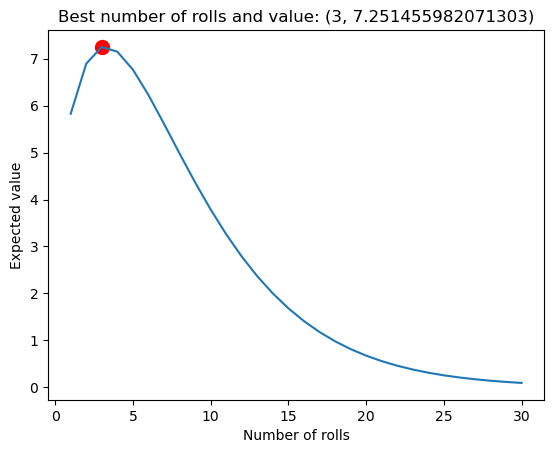

In [123]:
# Total score on n rolls
n_val = 30

def score_n_rolls(n):
    return (go_again_prob**n)*expected*n

values_n = [score_n_rolls(n+1) for n in range(1,n_val+1)]

plt.plot(range(1,n_val+1),values_n)

# Find the max y-value and its corresponding x-value
max_y = max(values_n)
max_x = range(1,n_val+1)[values_n.index(max_y)]

# Highlight the maximum point
plt.scatter(max_x, max_y, color='red', s=100, label='Max value')  # 's' is the size of the marker
plt.title(f'Best number of rolls and value: ({max_x}, {max_y})')
plt.xlabel('Number of rolls')
plt.ylabel('Expected value')


### Model 2: Probability of getting a score "E"?

We want to find the best score such that the next roll would lower our values.

line 1 => y =  (go_again_prob)*(expected+n)

line 2 => y = x

Solve for x:

(go_again_prob)*(expected+x) = x

go_again_prob*expected + go_again_prob*x = x

x = go_again_prob*expected/(1-go_again_prob)


range(1, 31)

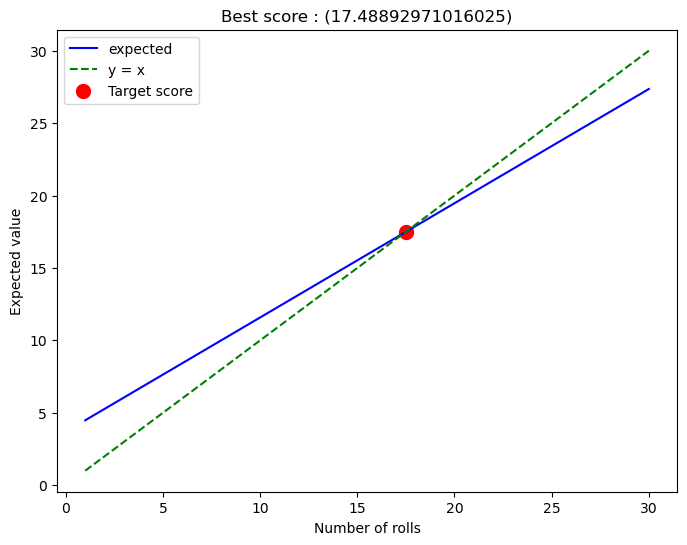

In [121]:
# Total score on n rolls
n_val = 30

def at_n_rolls(n):
    return (go_again_prob)*(expected+n)

values_n = [at_n_rolls(n+1) for n in range(0,n_val)]


# Find the max y-value and its corresponding x-value
max_y = max(values_n)
max_x = range(0,n_val+1)[values_n.index(max_y)]

# Calculate intersection
x_intersect = go_again_prob*expected/(1-go_again_prob)
y_intersect = go_again_prob*expected + go_again_prob*x_intersect 

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(range(1,n_val+1),values_n, label='expected', color='blue')
plt.plot(range(1,n_val+1), range(1,n_val+1), label='y = x', linestyle='--', color='green')

# Highlight the maximum point
plt.scatter(x_intersect, y_intersect, color='red', s=100, label='Target score')  # 's' is the size of the marker
plt.title(f'Best score : ({y_intersect})')
plt.xlabel('Number of rolls')
plt.ylabel('Expected value')
plt.legend()

range(1,n_val+1)